# BPIC 2020

In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.processor import *
from data.args import *

from tensorflow.keras.utils import to_categorical

### Define the experiment parameters

In [80]:
milestone = 'All' #'A_PREACCEPTED' # 'W_Nabellen offertes', 'All'
experiment =  'OHE'#'Standard'#'OHE', 'No_loops'
n_size = 5
max_size = 1000 #  3, 5, 10, 15, 20, 30, 50, 95
min_size = 0  # 0, 3, 5, 10, 15, 20, 30, 50

### Setting up the key parameters


In [81]:
# # For local environment only

MY_WORKSPACE_DIR = os.path.join(os.getcwd(),'BPIC20')
MILESTONE_DIR = os.path.join(os.path.join(MY_WORKSPACE_DIR, milestone),experiment)

In [82]:
args = get_parameters('bpic20', MILESTONE_DIR, MY_WORKSPACE_DIR, milestone, experiment,n_size)
args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\BPIC_2020_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\BPIC_2020_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\All\\OHE\\BPIC_2

In [83]:
#This code will be specific for all next activity prediction only, since we save the models and vectors by prefix length groups
if milestone == 'All':
  args['indexes'] = MILESTONE_DIR+'indexes_'+str(max_size)+'.p'
  args['pre_index'] = MILESTONE_DIR+'pre_index_'+str(max_size)+'.p'
  args['processed_test_vec'] = MILESTONE_DIR+'vec_test_'+str(max_size)+'.p'
  args['processed_training_vec'] = MILESTONE_DIR+'vec_training_'+str(max_size)+'.p'
  args['weights'] = MILESTONE_DIR+'weights_'+str(max_size)+'.p'

args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\BPIC_2020_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\BPIC_2020_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC20\\All\\OHE\\BPIC_2

### Data Preprocessing

In [84]:
if milestone == 'All':
  log_df = pd.read_csv(args['file_name_all'])
  log_df = log_df.reset_index(drop=True)
else:
  log_df = pd.read_csv(args['file_name'])
  log_df = log_df.reset_index(drop=True)

log_df.head()

,prefix_id,caseid,end_timestamp,task,next_activity,prefix_length,task_index,trace_start,timelapsed,role,time:timestamp,org:resource,concept:name,id
0,request for payment 148214_1,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment FINAL_APPROVED by SUPERVISOR,1,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0
1,request for payment 148214_2,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment REJECTED by MISSING,2,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0
2,request for payment 148214_2,request for payment 148214,2017-01-09 09:18:00+01:00,Request For Payment FINAL_APPROVED by SUPERVISOR,Request For Payment REJECTED by MISSING,2,10,2017-01-09 09:17:18+01:00,0,SUPERVISOR,2017-01-09 09:18:00+01:00,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,st_step 148221_0
3,request for payment 148214_3,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,3,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0
4,request for payment 148214_3,request for payment 148214,2017-01-09 09:18:00+01:00,Request For Payment FINAL_APPROVED by SUPERVISOR,Request For Payment SUBMITTED by EMPLOYEE,3,10,2017-01-09 09:17:18+01:00,0,SUPERVISOR,2017-01-09 09:18:00+01:00,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,st_step 148221_0


Milestone Extraction

We expect to filter the prefixes by the milestone, and train the model for each milestone separately to observe if there will be an improvement in the model explainability as well as performance


In [85]:
if milestone != 'All':
  log_df = log_df[log_df['milestone'] == milestone]
else:
  log_df = log_df[(log_df['prefix_length'] > min_size) & (log_df['prefix_length'] <= max_size) ]

#### Data Analysis

In [86]:
#Checking the Balance of the Dataset, by the target variable
print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
Payment Handled                                     6307
Request For Payment APPROVED by ADMINISTRATION      5489
Request For Payment APPROVED by BUDGET OWNER        2014
Request For Payment APPROVED by PRE_APPROVER         413
Request For Payment APPROVED by SUPERVISOR            41
Request For Payment FINAL_APPROVED by DIRECTOR        41
Request For Payment FINAL_APPROVED by SUPERVISOR    6343
Request For Payment REJECTED by ADMINISTRATION       836
Request For Payment REJECTED by BUDGET OWNER          47
Request For Payment REJECTED by EMPLOYEE            1085
Request For Payment REJECTED by MISSING               66
Request For Payment REJECTED by PRE_APPROVER          51
Request For Payment REJECTED by SUPERVISOR           179
Request For Payment SUBMITTED by EMPLOYEE            690
Request Payment                                     6303
Name: prefix_id, dtype: int64


We can see that there is an imbalance in the dataset, by the next activity name, as well as a very high dimensionality in the target variable.
Therefore, we can reduce the imbalance and high dimensionality of data by grouping some of the activity name.


Balancing the dataset


In [87]:
def balance(df):
  # Dictonary with the mapping of columns
  
  #based on the paper : BPIC_2012 Winner, DOI: 10.1007/978-3-642-36285-9_24

  # group_dict = {'A_ACCEPTED':'A_ACCEPTED',    
  #   'A_ACTIVATED' :   'A_APPROVED_ACTIVATED',
  #   'A_APPROVED':  'A_APPROVED_ACTIVATED',
  #   'A_CANCELLED': 'A_CANCELLED_DECLINED' ,
  #   'A_DECLINED': 'A_CANCELLED_DECLINED' ,
  #   'A_PARTLYSUBMITTED': 'REDUNDANT',
  #   'A_PREACCEPTED':'A_PREACCEPTED',
  #   'A_REGISTERED' : 'REDUNDANT',
  #   'O_ACCEPTED' : 'REDUNDANT',
  #   'O_CANCELLED' :  'O_CANCELLED_DECLINED' ,
  #   'O_CREATED':'REDUNDANT',
  #   'O_DECLINED' :'O_CANCELLED_DECLINED' ,
  #   'O_SELECTED' : 'REDUNDANT', 
  #   'O_SENT':'O_SENT',
  #   'O_SENT_BACK' : 'O_SENT_BACK',
  #   'W_Afhandelen leads' :  'W_Afhandelen leads',
  #   'W_Completeren aanvraag': 'W_Completeren aanvraag',
  #   'W_Nabellen incomplete dossiers':'W_Nabellen incomplete dossiers',
  #   'W_Nabellen offertes':'W_Nabellen offertes',
  #   'W_Valideren aanvraag' : 'W_Valideren aanvraag'}


  # df['next_activity'].replace(group_dict, inplace=True)
  # #Dropping the minority classes
  # df = df.drop(df[df.next_activity == 'REDUNDANT'].index)
 

  return df

In [88]:
log_df = balance(log_df)



#replacing empty cells of categorical columns with 'none'
log_df = log_df.fillna('none')

In [89]:
# Check the balance

print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
Payment Handled                                     6307
Request For Payment APPROVED by ADMINISTRATION      5489
Request For Payment APPROVED by BUDGET OWNER        2014
Request For Payment APPROVED by PRE_APPROVER         413
Request For Payment APPROVED by SUPERVISOR            41
Request For Payment FINAL_APPROVED by DIRECTOR        41
Request For Payment FINAL_APPROVED by SUPERVISOR    6343
Request For Payment REJECTED by ADMINISTRATION       836
Request For Payment REJECTED by BUDGET OWNER          47
Request For Payment REJECTED by EMPLOYEE            1085
Request For Payment REJECTED by MISSING               66
Request For Payment REJECTED by PRE_APPROVER          51
Request For Payment REJECTED by SUPERVISOR           179
Request For Payment SUBMITTED by EMPLOYEE            690
Request Payment                                     6303
Name: prefix_id, dtype: int64


In [90]:

#minority reduction. if certain samples are < 5, reduce via below

#log_df = log_df.drop(log_df[log_df.next_activity == 'W_Afhandelen leads'].index)



Reduce Loops

Function : `reduce_loops(df)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [91]:
if experiment == 'No_Loops':
  log_df = reduce_loops(log_df)

#### Data Encoding and Vectorization

Index creating for data encoding
Function : `create_index(log_df, column)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [92]:
# Index creation for activity

ac_index = create_index(log_df, 'task')
index_ac = {v: k for k, v in ac_index.items()}

# Index creation for unit

rl_index = create_index(log_df, 'role')
index_rl = {v: k for k, v in rl_index.items()}

# Index creation for next activity

ne_index = create_index(log_df, 'next_activity')

index_ne = {v: k for k, v in ne_index.items()}

#mapping the dictionary values as columns in the dataframe
log_df['ac_index'] = log_df['task'].map(ac_index)
log_df['rl_index'] = log_df['role'].map(rl_index)
log_df['ne_index'] = log_df['next_activity'].map(ne_index)

print(rl_index)
print(index_rl)
log_df.head()

{'none': 0, 'ADMINISTRATION': 1, 'BUDGET OWNER': 2, 'DIRECTOR': 3, 'EMPLOYEE': 4, 'MISSING': 5, 'PRE_APPROVER': 6, 'SUPERVISOR': 7, 'UNDEFINED': 8}
{0: 'none', 1: 'ADMINISTRATION', 2: 'BUDGET OWNER', 3: 'DIRECTOR', 4: 'EMPLOYEE', 5: 'MISSING', 6: 'PRE_APPROVER', 7: 'SUPERVISOR', 8: 'UNDEFINED'}


,prefix_id,caseid,end_timestamp,task,next_activity,prefix_length,task_index,trace_start,timelapsed,role,time:timestamp,org:resource,concept:name,id,ac_index,rl_index,ne_index
0,request for payment 148214_1,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment FINAL_APPROVED by SUPERVISOR,1,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0,14,4,6
1,request for payment 148214_2,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment REJECTED by MISSING,2,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0,14,4,10
2,request for payment 148214_2,request for payment 148214,2017-01-09 09:18:00+01:00,Request For Payment FINAL_APPROVED by SUPERVISOR,Request For Payment REJECTED by MISSING,2,10,2017-01-09 09:17:18+01:00,0,SUPERVISOR,2017-01-09 09:18:00+01:00,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,st_step 148221_0,7,7,10
3,request for payment 148214_3,request for payment 148214,2017-01-09 09:17:18+01:00,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,3,6,2017-01-09 09:17:18+01:00,0,EMPLOYEE,2017-01-09 09:17:18+01:00,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,st_step 148220_0,14,4,13
4,request for payment 148214_3,request for payment 148214,2017-01-09 09:18:00+01:00,Request For Payment FINAL_APPROVED by SUPERVISOR,Request For Payment SUBMITTED by EMPLOYEE,3,10,2017-01-09 09:17:18+01:00,0,SUPERVISOR,2017-01-09 09:18:00+01:00,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,st_step 148221_0,7,7,13


In [93]:
print(ne_index)

{'Payment Handled': 0, 'Request For Payment APPROVED by ADMINISTRATION': 1, 'Request For Payment APPROVED by BUDGET OWNER': 2, 'Request For Payment APPROVED by PRE_APPROVER': 3, 'Request For Payment APPROVED by SUPERVISOR': 4, 'Request For Payment FINAL_APPROVED by DIRECTOR': 5, 'Request For Payment FINAL_APPROVED by SUPERVISOR': 6, 'Request For Payment REJECTED by ADMINISTRATION': 7, 'Request For Payment REJECTED by BUDGET OWNER': 8, 'Request For Payment REJECTED by EMPLOYEE': 9, 'Request For Payment REJECTED by MISSING': 10, 'Request For Payment REJECTED by PRE_APPROVER': 11, 'Request For Payment REJECTED by SUPERVISOR': 12, 'Request For Payment SUBMITTED by EMPLOYEE': 13, 'Request Payment': 14}


Splitting the dataframe into test and train sets

Function : `split_train_test(df, percentage)`, Author: Bemali Wickramanayake

In [94]:
# Split validation datasets
log_df_train, log_df_test = split_train_test(log_df, 0.3) # 70%/30%

# Self implemented stratified split

In [95]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame log_df with a 'prefix_id' column

# Identify unique cases (prefix_id values)
unique_cases = log_df['prefix_id'].unique()

# Split the unique cases into training and test sets
train_cases, test_cases = train_test_split(unique_cases, test_size=0.3, random_state=42)

# Use the selected cases to filter your original DataFrame
log_df_train = log_df[log_df['prefix_id'].isin(train_cases)]
log_df_test = log_df[log_df['prefix_id'].isin(test_cases)]

# Now, log_df_train contains cases assigned to the training set, and log_df_test contains cases assigned to the test set.

Normalize Numerical Features

Function : `normalize_events(log_df,args,numerical_features)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake


In [96]:
numerical_features = ['timelapsed']
log_df_train = normalize_events(log_df_train,args,numerical_features)
log_df_test = normalize_events(log_df_test,args,numerical_features)


c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\Shared-and-Specialised-Attention-based-Interpretable-Models\data\processor.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['%s_log'%(feature)] = log_df.apply(logit, axis=1)
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\Shared-and-Specialised-Attention-based-Interpretable-Models\data\processor.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[

In [97]:
training_traces = len(log_df_train['prefix_id'].unique())
test_traces = len(log_df_test['prefix_id'].unique())


print('Number of traces in training set is:'+str(training_traces))
print('Number of traces in test set is:'+str(test_traces))


Number of traces in training set is:20933
Number of traces in test set is:8972


In [98]:
#Checking the Balance of the Dataset, by the target variable
print('training dataset')
print(log_df_train.groupby(['next_activity'])['prefix_id'].nunique())
print("")


training dataset
next_activity
Payment Handled                                     4449
Request For Payment APPROVED by ADMINISTRATION      3832
Request For Payment APPROVED by BUDGET OWNER        1398
Request For Payment APPROVED by PRE_APPROVER         274
Request For Payment APPROVED by SUPERVISOR            30
Request For Payment FINAL_APPROVED by DIRECTOR        28
Request For Payment FINAL_APPROVED by SUPERVISOR    4448
Request For Payment REJECTED by ADMINISTRATION       559
Request For Payment REJECTED by BUDGET OWNER          34
Request For Payment REJECTED by EMPLOYEE             764
Request For Payment REJECTED by MISSING               50
Request For Payment REJECTED by PRE_APPROVER          39
Request For Payment REJECTED by SUPERVISOR           131
Request For Payment SUBMITTED by EMPLOYEE            463
Request Payment                                     4434
Name: prefix_id, dtype: int64



In [99]:
print('test dataset')
print(log_df_test.groupby(['next_activity'])['prefix_id'].nunique())
print("")

test dataset
next_activity
Payment Handled                                     1858
Request For Payment APPROVED by ADMINISTRATION      1657
Request For Payment APPROVED by BUDGET OWNER         616
Request For Payment APPROVED by PRE_APPROVER         139
Request For Payment APPROVED by SUPERVISOR            11
Request For Payment FINAL_APPROVED by DIRECTOR        13
Request For Payment FINAL_APPROVED by SUPERVISOR    1895
Request For Payment REJECTED by ADMINISTRATION       277
Request For Payment REJECTED by BUDGET OWNER          13
Request For Payment REJECTED by EMPLOYEE             321
Request For Payment REJECTED by MISSING               16
Request For Payment REJECTED by PRE_APPROVER          12
Request For Payment REJECTED by SUPERVISOR            48
Request For Payment SUBMITTED by EMPLOYEE            227
Request Payment                                     1869
Name: prefix_id, dtype: int64



In [100]:
# differce between training and test set
print('Difference between training and test set')
print(log_df_train.groupby(['next_activity'])['prefix_id'].nunique()-log_df_test.groupby(['next_activity'])['prefix_id'].nunique())

Difference between training and test set
next_activity
Payment Handled                                     2591
Request For Payment APPROVED by ADMINISTRATION      2175
Request For Payment APPROVED by BUDGET OWNER         782
Request For Payment APPROVED by PRE_APPROVER         135
Request For Payment APPROVED by SUPERVISOR            19
Request For Payment FINAL_APPROVED by DIRECTOR        15
Request For Payment FINAL_APPROVED by SUPERVISOR    2553
Request For Payment REJECTED by ADMINISTRATION       282
Request For Payment REJECTED by BUDGET OWNER          21
Request For Payment REJECTED by EMPLOYEE             443
Request For Payment REJECTED by MISSING               34
Request For Payment REJECTED by PRE_APPROVER          27
Request For Payment REJECTED by SUPERVISOR            83
Request For Payment SUBMITTED by EMPLOYEE            236
Request Payment                                     2565
Name: prefix_id, dtype: int64


Reformat events: converting the dataframe into a dictionary to aid vectorization

Function : `reformat_events(log_df, ac_index, rl_index,ne_index)`, Author: Renuka Sindagatta/ Manuel Camargo, Edited by: Bemali Wickramanayake




In [101]:
log_train = reformat_events(log_df_train, ac_index, rl_index,ne_index)
log_test = reformat_events(log_df_test, ac_index, rl_index,ne_index)
#log_val = reformat_events(log_df_val, ac_index, rl_index,ne_index)

#print a sample of the dictionary
print(log_train[100])

{'caseid': 'request for payment 147721_1', 'ac_order': [14], 'rl_order': [4], 'tbtw': [-0.7267095133671024], 'next_activity': 3}


Vectorization: Convert the data dictionaries into trainable multi dimensional tensors

Function: `vectorization(log,ac_index, rl_index, ne_index,trc_len,cases)` , Author: Bemali Wickramanayake, Inspired by the code of: Renuka Sindagatta





In [102]:
#Obtain the maximum trc_len and cases for each set

trc_len_train, cases_train = lengths(log_train)
trc_len_test, cases_test = lengths(log_test)
#trc_len_val, cases_val = lengths(log_val)

trc_len = max([trc_len_train, trc_len_test])

print("trace_length: "+str(trc_len)+", training cases: "+str(cases_train)+", test cases: "+str(cases_test) )

trace_length: 19, training cases: 20934, test cases: 8973


In [103]:
vec_train = vectorization(log_train,ac_index, rl_index, ne_index,trc_len,cases_train)
vec_test = vectorization(log_test,ac_index, rl_index, ne_index,trc_len,cases_test)
#vec_val = vectorization(log_val,ac_index, rl_index, ne_index,trc_len,cases_val)

In [104]:
vec_train['prefixes']['x_ac_inp']

array([[14.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7., 14.,  0., ...,  0.,  0.,  0.],
       ...,
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  2.,  0., ...,  0.,  0.,  0.],
       [15.,  7., 14., ...,  0.,  0.,  0.]])

#### Generating Initial Embedding Weights for Shared Model

In [105]:
ac_weights = to_categorical(sorted(index_ac.keys()), num_classes = len(ac_index))
ac_weights[0] = 0 # embedding weights for label none = 0

rl_weights =  to_categorical(sorted(index_rl.keys()), num_classes = len(rl_index))
rl_weights[0] = 0 # embeddig weights for label none = 0


#### Saving the Processed Tensor and Other Support Data

In [106]:
# saving the processed tensor
dirname = os.path.dirname(args['processed_training_vec'])

if not os.path.exists(dirname):
    os.makedirs(dirname)

with open(args['processed_training_vec'], 'wb') as fp:
    pickle.dump(vec_train, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(args['processed_test_vec'], 'wb') as fp:
    pickle.dump(vec_test, fp, protocol=pickle.HIGHEST_PROTOCOL)


# converting the weights into a dictionary and saving
weights = {'ac_weights':ac_weights, 'rl_weights':rl_weights, 'next_activity':len(ne_index)}
with open(args['weights'], 'wb') as fp:
    pickle.dump(weights, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
indexes = {'index_ac':index_ac, 'index_rl':index_rl,'index_ne':index_ne}
with open(args['indexes'], 'wb') as fp:
    pickle.dump(indexes, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
pre_index = {'ac_index':ac_index, 'rl_index':rl_index,'ne_index':ne_index}
with open(args['pre_index'], 'wb') as fp:
    pickle.dump(pre_index, fp, protocol=pickle.HIGHEST_PROTOCOL)

#saving the arguements (args)
# with open(args['args'], 'wb') as fp:
#     pickle.dump(args, fp, protocol=pickle.HIGHEST_PROTOCOL)


### Experiments

#### Load the Required Libraries

In [107]:
!pip3 install pyflowchart


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
!pip3 install pyflowchart


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
import os
import pickle
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import callbacks, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from pyflowchart import *
import plotly.express as px

from models.shared import *
from models.specialised import *
from models.explain import *

#### Load the Required Parameters

In [110]:
#with open(os.path.join(MILESTONE_DIR,'args.p'), 'rb') as fp:
    #args = pickle.load(fp)

with open(args['processed_training_vec'], 'rb') as fp:
    vec_train = pickle.load(fp)
with open(args['processed_test_vec'], 'rb') as fp:
    vec_test = pickle.load(fp)
    
with open(args['weights'], 'rb') as fp:
    weights = pickle.load(fp)
ac_weights = weights['ac_weights']
rl_weights = weights['rl_weights']
next_activity = weights['next_activity']

with open(args['indexes'], 'rb') as fp:
    indexes = pickle.load(fp)
    index_ac = indexes['index_ac']
    index_rl = indexes['index_rl']
    index_ne = indexes['index_ne']

with open(args['pre_index'], 'rb') as fp:
    pre_index = pickle.load(fp)
    ac_index = pre_index['ac_index']
    rl_index = pre_index['rl_index']
    ne_index = pre_index['ne_index']

#### Shared Model

In [111]:
shared = shared_model(vec_train, weights, indexes, pre_index, args)

In [112]:
shared.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
shared.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 ac_embedding (Embedding)    (None, 5, 16)                256       ['ac_input[0][0]']            
                                                                                                  
 rl_embedding (Embedding)    (None, 5, 9)                 81        ['rl_input[0][0]']            
                                                                                            

                                                                     'dropout_4[0][0]']           
                                                                                                  
 lambda_2 (Lambda)           (None, 26)                   0         ['feature_importance[0][0]']  
                                                                                                  
 dropout_5 (Dropout)         (None, 26)                   0         ['lambda_2[0][0]']            
                                                                                                  
 act_output (Dense)          (None, 15)                   405       ['dropout_5[0][0]']           
                                                                                                  
Total params: 65069 (254.18 KB)
Trainable params: 65069 (254.18 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [113]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [114]:
shared_history = shared_model_fit(vec_train, shared, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

Epoch 1/200
140/140 [==============================] - 48s 134ms/step - loss: 2.1623 - accuracy: 0.4451 - val_loss: 1.3986 - val_accuracy: 0.6676 - lr: 0.0010
Epoch 2/200
140/140 [==============================] - 16s 118ms/step - loss: 1.1436 - accuracy: 0.6822 - val_loss: 0.8322 - val_accuracy: 0.8446 - lr: 0.0010
Epoch 3/200
140/140 [==============================] - 16s 117ms/step - loss: 0.7539 - accuracy: 0.8162 - val_loss: 0.4664 - val_accuracy: 0.8695 - lr: 0.0010
Epoch 4/200
140/140 [==============================] - 14s 99ms/step - loss: 0.5943 - accuracy: 0.8318 - val_loss: 0.4076 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 5/200
140/140 [==============================] - 14s 101ms/step - loss: 0.5474 - accuracy: 0.8366 - val_loss: 0.3861 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 6/200
140/140 [==============================] - 12s 84ms/step - loss: 0.5245 - accuracy: 0.8406 - val_loss: 0.3772 - val_accuracy: 0.8739 - lr: 0.0010
Epoch 7/200
140/140 [===========================

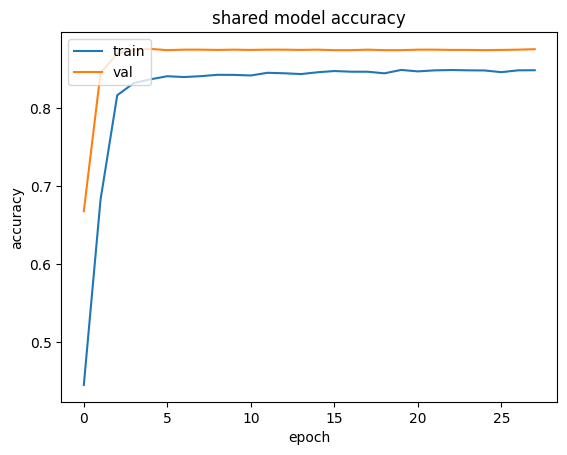

In [115]:
plot_shared(shared_history)

In [116]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [117]:
shared_trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared_model = load_model(shared_trained_model)

In [118]:
x_test,y_test = generate_inputs_shared(vec_test,args,indexes)

print("Evaluate on test data")

results = shared_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred_shared = shared_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
281/281 [==============================] - 8s 3ms/step
test loss, test acc: [0.4306280016899109, 0.8441992402076721]


In [119]:
m1_y_test = y_test.argmax(axis=1)
m1_y_pred = y_pred_shared.argmax(axis=1)

Classification Report

In [120]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1), target_names=target_names))

                                                  precision    recall  f1-score   support

                                 Payment Handled       1.00      1.00      1.00      1858
  Request For Payment APPROVED by ADMINISTRATION       0.71      0.99      0.83      1657
    Request For Payment APPROVED by BUDGET OWNER       0.00      0.00      0.00       616
    Request For Payment APPROVED by PRE_APPROVER       0.00      0.00      0.00       140
      Request For Payment APPROVED by SUPERVISOR       0.00      0.00      0.00        11
  Request For Payment FINAL_APPROVED by DIRECTOR       0.75      0.46      0.57        13
Request For Payment FINAL_APPROVED by SUPERVISOR       0.71      0.88      0.79      1895
  Request For Payment REJECTED by ADMINISTRATION       0.00      0.00      0.00       277
    Request For Payment REJECTED by BUDGET OWNER       0.00      0.00      0.00        13
        Request For Payment REJECTED by EMPLOYEE       0.98      0.98      0.98       321
         

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-d

Confusion Matrix

[[1855    0    0    0    0    0    1    0    0    0    0    0    0    0
     2]
 [   0 1646    0    0    0    0    7    0    0    0    0    0    0    4
     0]
 [   0    9    0    0    0    0  605    0    0    0    0    0    0    2
     0]
 [   0  134    0    0    0    0    6    0    0    0    0    0    0    0
     0]
 [   0    3    0    0    0    0    8    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    6    0    0    0    0    0    0    0    0
     7]
 [   0  218    0    0    0    0 1672    0    0    0    0    0    0    3
     2]
 [   0  276    0    0    0    0    1    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0   13    0    0    0    0    0    0    0
     0]
 [   0    4    0    0    0    0    1    0    0  313    0    0    0    3
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    16]
 [   0   12    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   14    0    0    0    0   34    

<Axes: >

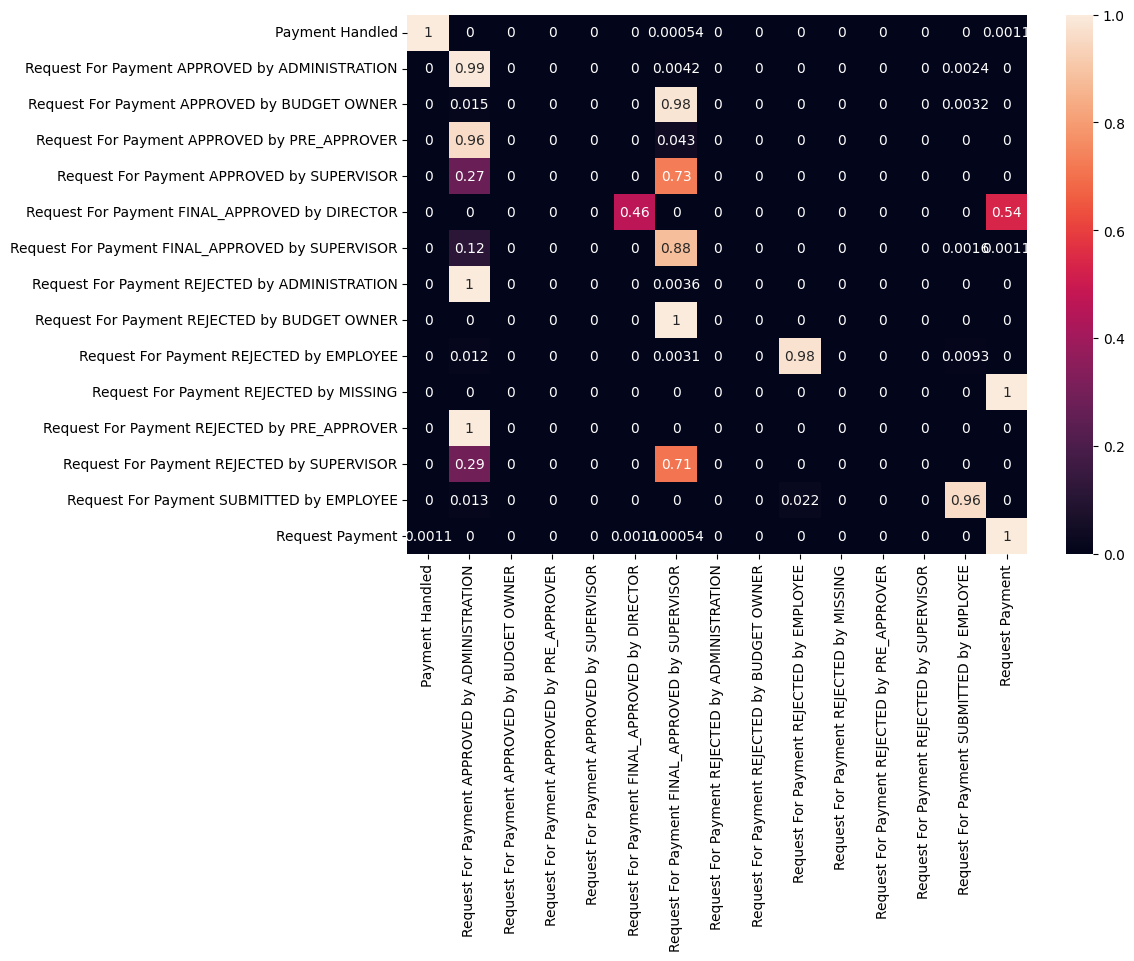

In [121]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### specialised Model

In [122]:
specialised = specialised_model(vec_train, weights, indexes, pre_index, args)


In [123]:
specialised.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [124]:
specialised.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5, 16)]              0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5, 9)]               0         []                            
                                                                                                  
 t_input (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 beta_ac (Bidirectional)     (None, 5, 100)               26800     ['ac_input[0][0]']            
                                                                                            

In [125]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [126]:
specialised_history = specialised_model_fit(vec_train, specialised, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

This is the output file path  c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\Shared-and-Specialised-Attention-based-Interpretable-Models\BPIC20\models\model_specialised_All_{epoch:02d}-{val_loss:.2f}.h5
Epoch 1/200
140/140 [==============================] - 31s 85ms/step - loss: 2.2459 - accuracy: 0.5117 - val_loss: 1.7271 - val_accuracy: 0.5944 - lr: 0.0010
Epoch 2/200
140/140 [==============================] - 8s 57ms/step - loss: 1.5290 - accuracy: 0.7348 - val_loss: 1.2413 - val_accuracy: 0.8290 - lr: 0.0010
Epoch 3/200
140/140 [==============================] - 6s 43ms/step - loss: 1.2034 - accuracy: 0.7733 - val_loss: 0.9732 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 4/200
140/140 [==============================] - 6s 42ms/step - loss: 1.0261 - accuracy: 0.7890 - val_loss: 0.8138 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 5/200
140/140 [==============================] - 6s 45ms/step - loss: 0.9049 - accuracy: 0.7986 - val_loss: 0.709

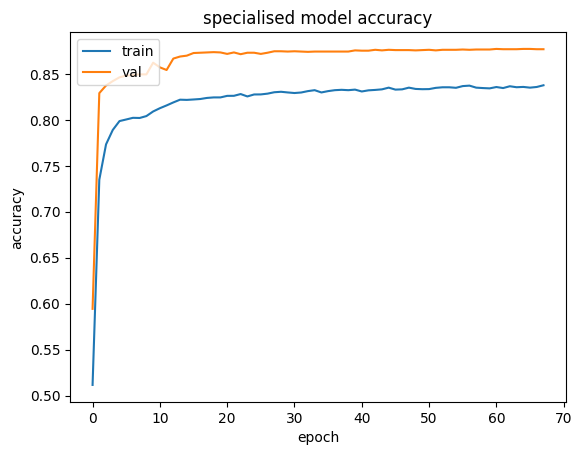

In [127]:
plot_specialised(specialised_history)

In [128]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [129]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised_model = load_model(trained_model)

Evaluating Prediction Performance

In [130]:
# Generating Inputs

x_test,y_test = generate_inputs(vec_test,args,indexes, experiment)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

results = specialised_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred = specialised_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
281/281 [==============================] - 10s 4ms/step
test loss, test acc: [0.43781524896621704, 0.8436420559883118]


In [131]:
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [132]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       0.71      0.99      0.83      1657
           2       0.00      0.00      0.00       616
           3       0.86      0.04      0.08       140
           4       0.00      0.00      0.00        11
           5       1.00      0.46      0.63        13
           6       0.71      0.88      0.79      1895
           7       0.00      0.00      0.00       277
           8       0.00      0.00      0.00        13
           9       0.98      0.97      0.97       321
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        48
          13       0.93      0.95      0.94       227
          14       0.98      1.00      0.99      1869

    accuracy                           0.84      8973
   macro avg       0.48      0.42      0.42      8973
weighted avg       0.77   

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-d

Confusion Matrix

[[1855    0    0    0    0    0    1    0    0    0    0    0    0    0
     2]
 [   0 1648    0    0    0    0    4    0    0    0    0    0    0    5
     0]
 [   0   11    0    0    0    0  603    0    0    0    0    0    0    2
     0]
 [   0  128    0    6    0    0    4    0    0    0    0    0    0    0
     2]
 [   0    3    0    0    0    0    8    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    6    1    0    0    0    0    0    0    0
     6]
 [   0  223    3    0    0    0 1662    0    0    0    0    0    0    3
     4]
 [   0  275    0    0    0    0    0    0    0    1    0    0    0    1
     0]
 [   0    0    0    0    0    0   13    0    0    0    0    0    0    0
     0]
 [   0    5    1    0    0    0    0    0    0  311    0    0    0    4
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    16]
 [   0   11    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   14    0    0    0    0   34    

<Axes: >

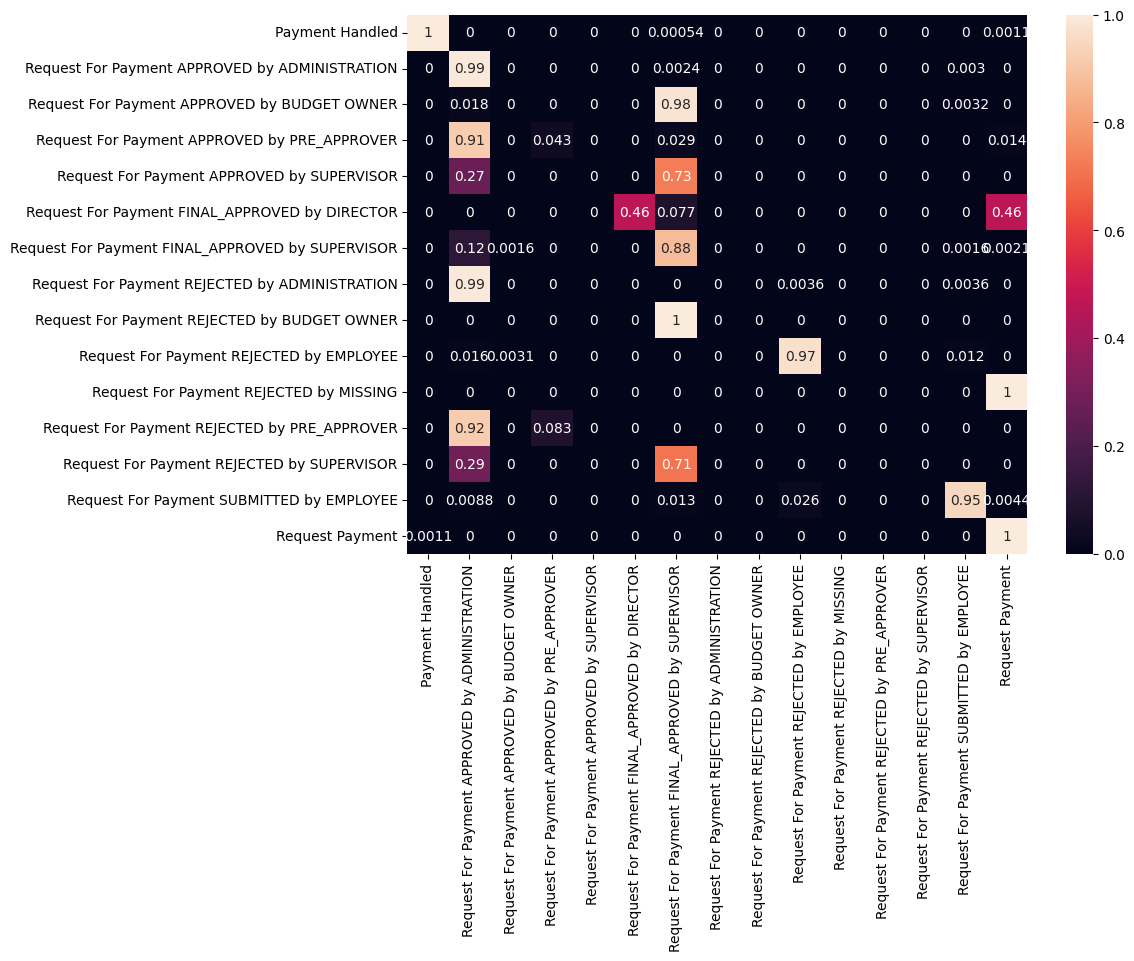

In [133]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)